In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import jieba
illegal_data=pd.read_csv("illegal_data.csv",encoding="utf-8")

In [2]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体  
  
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

In [3]:
print(illegal_data.columns)
illegal_data.rename(columns={illegal_data.columns[0]:'id'},inplace=True)
illegal_data.rename(columns={illegal_data.columns[1]:'jszh'},inplace=True)
print(illegal_data.columns)

Index(['Unnamed: 0', '﻿jsz8', 'wfbh', 'wfsj', 'wfxw', 'wfjf', 'wfnr'], dtype='object')
Index(['id', 'jszh', 'wfbh', 'wfsj', 'wfxw', 'wfjf', 'wfnr'], dtype='object')


处理列名

In [4]:
print(illegal_data.head(5))

   id                jszh                    wfbh                 wfsj   wfxw  \
0   0  366875518241534519  5201112015111811669521  2015-11-05 10:23:00  60230   
1   1  36606851984051445X  5201112015111811670071  2015-10-23 13:48:00  60230   
2   2  364555519243484051  5201112015111811670581  2015-10-27 16:09:00  60230   
3   3  364555519454427458  5201112015111811670611  2015-10-27 16:15:00  60230   
4   4  364556519841456672  5201112015111811671151  2015-11-16 13:22:00  60230   

  wfjf                             wfnr  
0    0  驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的  
1    0  驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的  
2    0  驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的  
3    0  驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的  
4    0  驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的  


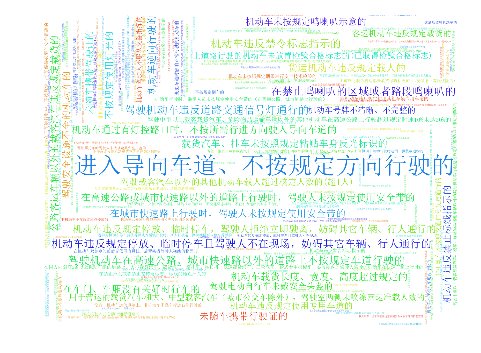

In [5]:
from wordcloud import WordCloud,STOPWORDS
wfnr=illegal_data["wfnr"].value_counts()
wfnr_zip=list(zip(wfnr.index,wfnr))
wfnr_zip=wfnr_zip[1:]
wordcloud = WordCloud(font_path='C:\Windows\Fonts\simsun.ttc',background_color="white",
                      scale=2.0,margin=0,relative_scaling=0,prefer_horizontal =0.6,
                      random_state = 1,width=800,height=600).\
                fit_words(wfnr_zip)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("wfnr.png")

对违法行为的字体云可视化，可以看到出现次数最多的是不按规定方向行驶

In [6]:
wfnr_string=""
wfnr_string=wfnr_string.join(illegal_data["wfnr"])
wfnr_list=list(jieba.cut(wfnr_string))
print(wfnr_list)

Building prefix dict from the default dictionary ...


Dumping model to file cache C:\Users\trian\AppData\Local\Temp\jieba.cache


Loading model cost 2.798 seconds.


Prefix dict has been built succesfully.


对违法行为的所有条目进行中文分词

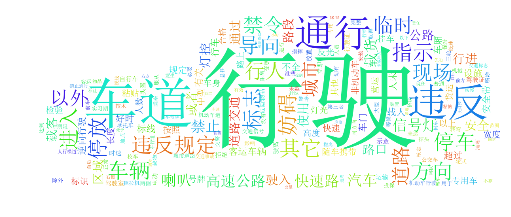

In [7]:
from wordcloud import WordCloud,STOPWORDS
from os import path
from scipy.misc import imread
traffic_img=imread(path.join("car_map.jpg"))
wfnr_text=r" ".join(wfnr_list)
stopwords=STOPWORDS.add("驾驶")
stopwords=STOPWORDS.add("机动车")
stopwords=STOPWORDS.add("按规定")


wordcloud = WordCloud(font_path='C:\Windows\Fonts\simsun.ttc',background_color="white",
                      scale=2.0,margin=0,relative_scaling=0,prefer_horizontal =0.6,
                      random_state = 1,width=800,height=600,mask=traffic_img,stopwords=stopwords).\
                generate(wfnr_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("wfnr_text.png")

对分词后的违法行为进行可视化，可以发现出现概率最大的违法行为是与行驶，车道相关

In [5]:
illegal_data.wfnr=illegal_data.wfnr.replace("\\N",np.nan)
illegal_data.wfjf=illegal_data.wfjf.replace("\\N",np.nan)

对违法内容，违法记分的数据进行数据清洗，将无效值设置为nan

In [6]:
illegal_code=pd.read_csv("illegal_code.csv",encoding="utf-8")
illegal_code=illegal_code.drop(0)
illegal_code.rename(columns={illegal_code.columns[0]:'id'},inplace=True)
print(illegal_code.head())

   id   code  fine  score                            content
1   1  10011   200    0.0   驾驶拼装的机动车上道路行驶的 （驾驶摩托车、拖拉机未从事营运的）
2   2  10012   500    0.0    驾驶拼装的机动车上道路行驶的 （驾驶摩托车、拖拉机从事营运的）
3   3  10013   500    0.0  驾驶拼装的机动车上道路行驶的 （驾驶其他类型的机动车未从事营运的）
4   4  10014  1000    0.0    驾驶拼装的机动车上道路行驶的（驾驶其他类型的机动车从事货运的）
5   5  10015  2000    0.0    驾驶拼装的机动车上道路行驶的（驾驶其他类型的机动车从事营运的）


获取从网络上爬取下来的贵阳市交通违法行为代码及相应内容

In [7]:
illegal_data["wfxw"]=illegal_data["wfxw"].str.pad(width=5,side='right', fillchar='0')
print(illegal_data["wfxw"].head(5))

0    60230
1    60230
2    60230
3    60230
4    60230
Name: wfxw, dtype: object


参考从网上爬下的标准代码，原始违法行为数据有部分代码不标准，对不标准的数据对齐加0

In [8]:
illegal_data=illegal_data.merge(illegal_code,how="left",left_on="wfxw",right_on="code")
print(illegal_data.columns)

Index(['id_x', 'jszh', 'wfbh', 'wfsj', 'wfxw', 'wfjf', 'wfnr', 'id_y', 'code',
       'fine', 'score', 'content'],
      dtype='object')


将原始数据与爬去下来的违法代码数据合并，其中score为违法行为的扣分，fine为违法行为相应的罚款数目，code与wfxw相同，指代违法行为的代码，wfnr与content相同，指代违法代码对应的违法内容

In [9]:
#print(illegal_data.loc[(illegal_data.wfnr.isnull()==True)&(illegal_data.content.isnull()==True),["wfxw","code","wfnr"]])
#print(illegal_data.loc[illegal_data.content.isnull()==True].count())
nanindex=list(illegal_data.loc[illegal_data.content.isnull()==True].index)
illegal_data["content"][nanindex]=illegal_data["wfnr"][nanindex]

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


实验发现，code列中部分为空，即原始数据中部分违法行为数据不在我们从网络上爬去的
违法代码中，所以我们将原始数据的wfxw代替这部分丢失的code数据

In [10]:
# print(illegal_data.loc[(illegal_data.wfjf.isnull()==True)&(illegal_data.score.isnull()==True),["wfxw","code","wfnr"]])
# print(illegal_data.loc[illegal_data.wfjf.isnull()==True].count())
jfindex=list(illegal_data.loc[illegal_data.score.isnull()==True].index)
illegal_data.loc[jfindex,"score"]=illegal_data.loc[jfindex,"wfjf"]

与上同理，处理部分丢失的违法记分数据

In [11]:
print(illegal_data.columns)
#illegal_data=illegal_data.drop(["id_y","wfnr","wfjf"],axis=1)
print(illegal_data.isnull().any())

Index(['id_x', 'jszh', 'wfbh', 'wfsj', 'wfxw', 'wfjf', 'wfnr', 'id_y', 'code',
       'fine', 'score', 'content'],
      dtype='object')
id_x       False
jszh       False
wfbh       False
wfsj       False
wfxw       False
wfjf        True
wfnr        True
id_y        True
code        True
fine        True
score      False
content    False
dtype: bool


获得处理后的违法数据内容，由于code与wfxw相同，content与wfnr相同，可以看到，只有罚款数据存在空值。由于这部分缺失的数据非常少，且并未在网上找到符合的内容，故接下来用平均值填充。

In [12]:
illegal_data.fine=illegal_data.fine.replace("最低保额两倍","2000")
illegal_data.fine=illegal_data.fine.fillna("0").astype(np.int64)
# print(illegal_data[illegal_data.fine==0]["fine"].count())
fine_mean=illegal_data.fine.sum()/illegal_data[illegal_data.fine!=0]["fine"].count()
print(int(fine_mean))

106


In [13]:
illegal_data.score=illegal_data.score.astype(np.int64)

illegal_data.wfxw=illegal_data.wfxw.replace("1710A","17101")
illegal_data.wfxw=illegal_data.wfxw.astype(np.int64)

以驾驶人驾驶证作为索引进行分组，获得每位驾驶员的违法数据信息，包括罚款总额，扣分总额，违法次数，违法种类数，和最近违法时间

In [14]:
illegal_driver_group = illegal_data.groupby("jszh", as_index=False, sort=False)
illegal_driver=illegal_driver_group.agg({"fine": np.sum, "score": np.sum})
#print(illegal_driver)
# print(illegal_driver_group["wfxw"].count())
maxtime=[]
xfcount=[]
for name,group in illegal_driver_group:
    xfcount.append(len(group["wfxw"].unique()))
    max="0"
    for time in group["wfsj"]:
        if(time>max):
            max=time
    maxtime.append(max)

In [23]:
# print(len(maxtime))
# print(len(xfcount))
illegal_driver["maxtime"]=maxtime
illegal_driver["xfcount"]=xfcount
# print(illegal_driver_group["wfxw"].count()["wfxw"])
illegal_driver["wfxw"]=illegal_driver_group["wfxw"].count()["wfxw"]
print(illegal_driver.head(5))

                 jszh  fine  score              maxtime  xfcount  wfxw
0  366875518241534519   500      0  2015-11-05 10:23:00        2     7
1  36606851984051445X   700      3  2015-11-12 09:47:00        4     8
2  364555519243484051   500      0  2015-10-27 16:09:00        3     8
3  364555519454427458   250      0  2015-10-27 16:15:00        2     5
4  364556519841456672   700      0  2015-11-27 14:26:00        4    11


In [25]:
illegal_driver.to_csv("illegal_driver.csv",encoding="utf-8",index_label="id")